<a href="https://colab.research.google.com/github/vipulshu123/Module-2-assignment/blob/main/Capstone_Project_Module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name - Exploratory Data Analysis(EDA)

Project - Play Store App Review Analysis

Problem statement

Playstore data is very import for the different application to store data and for furthur analysis. This data can help to improve the app. There is column of category which tells us about the app in which column it belong. There is column of Rating which help to know the rating of app. High rating means good app and low rating means there is need to better. There is column of review which tells us about people's thought regarding their views on app. There are other column like size of application, type of application i.e. either app is free or paid and if it is paid then what is the cost of that application. There is also a column of Content Rating which tells us about which type of people can access the qpp i.e. either it is for teen or for kids or for adults.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.shape

(10841, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Removing duplicates

In [ ]:
data[data.duplicated()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up


In [ ]:
data.duplicated().sum()

np.int64(483)

In [ ]:
data = data.drop_duplicates(ignore_index = True)
data.duplicated().sum()

np.int64(0)

Handling missing and null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
hidden_null = ['-','n/a','missing','na','--','N/A','unknown','Unknown']
data.replace(hidden_null , np.nan, inplace = True)

In [ ]:
data.isnull().sum()

,0
App,0
Category,0
Rating,1465
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
# Percentage of null values
data.isnull().mean()

,0
App,0.000000
Category,0.000000
Rating,0.141437
Reviews,0.000000
Size,0.000000
Installs,0.000000
Type,0.000097
Price,0.000000
Content Rating,0.000097
Genres,0.000000


In [ ]:
data.dropna(subset = ['Rating'], inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8893 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8893 non-null   object 
 1   Category        8893 non-null   object 
 2   Rating          8893 non-null   float64
 3   Reviews         8893 non-null   object 
 4   Size            8893 non-null   object 
 5   Installs        8893 non-null   object 
 6   Type            8893 non-null   object 
 7   Price           8893 non-null   object 
 8   Content Rating  8892 non-null   object 
 9   Genres          8893 non-null   object 
 10  Last Updated    8893 non-null   object 
 11  Current Ver     8889 non-null   object 
 12  Android Ver     8890 non-null   object 
dtypes: float64(1), object(12)
memory usage: 972.7+ KB


Outliers

In [ ]:
IQR = data['Rating'].quantile(0.75) - data['Rating'].quantile(0.25)
print(IQR)

0.5


In [ ]:
upper_bound = data['Rating'].quantile(0.75) + 1.5 * IQR
print(upper_bound)

5.25


In [ ]:
lower_bound = data['Rating'].quantile(0.25) - 1.5 * IQR
print(lower_bound)

3.25


In [ ]:
data[data['Rating'] > upper_bound]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
data.loc[data['Rating'] > upper_bound , 'Rating'] = upper_bound

In [ ]:
data[data['Rating'] > upper_bound]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Change in data type

In [ ]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors = 'coerce')


In [ ]:
print(data[['Last Updated']].head())

  Last Updated
0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8893 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8893 non-null   object        
 1   Category        8893 non-null   object        
 2   Rating          8893 non-null   float64       
 3   Reviews         8893 non-null   object        
 4   Size            8893 non-null   object        
 5   Installs        8893 non-null   object        
 6   Type            8893 non-null   object        
 7   Price           8893 non-null   object        
 8   Content Rating  8892 non-null   object        
 9   Genres          8893 non-null   object        
 10  Last Updated    8892 non-null   datetime64[ns]
 11  Current Ver     8889 non-null   object        
 12  Android Ver     8890 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 972.7+ KB


In [ ]:
# Extracting Components : most important components
data['year'] = data['Last Updated'].dt.year
data['month'] = data['Last Updated'].dt.month
data['day'] = data['Last Updated'].dt.day
data['weekday'] = data['Last Updated'].dt.day_name()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8893 entries, 0 to 10357
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8893 non-null   object        
 1   Category        8893 non-null   object        
 2   Rating          8893 non-null   float64       
 3   Reviews         8893 non-null   object        
 4   Size            8893 non-null   object        
 5   Installs        8893 non-null   object        
 6   Type            8893 non-null   object        
 7   Price           8893 non-null   object        
 8   Content Rating  8892 non-null   object        
 9   Genres          8893 non-null   object        
 10  Last Updated    8892 non-null   datetime64[ns]
 11  Current Ver     8889 non-null   object        
 12  Android Ver     8890 non-null   object        
 13  year            8892 non-null   float64       
 14  month           8892 non-null   float64       
 15  day     

Graph analysis

Chart1- Which year has most updata(countplot)

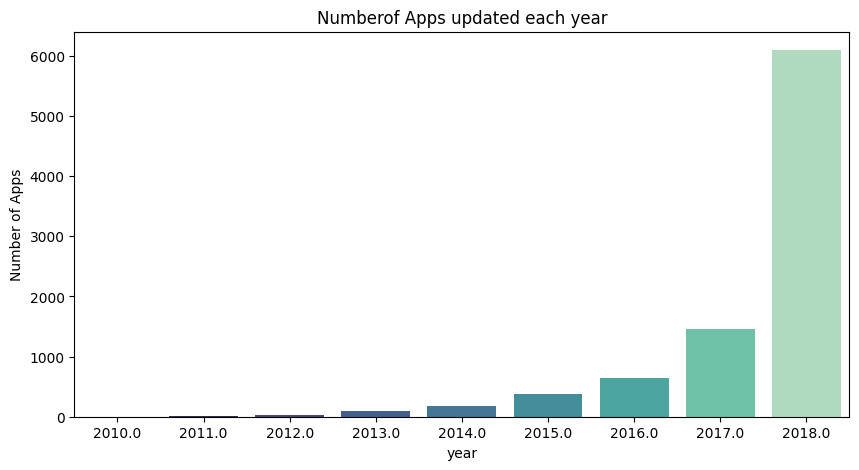

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='year', data = data, palette= 'mako')
plt.title('Numberof Apps updated each year')
plt.xlabel('year')
plt.ylabel('Number of Apps')
plt.show()

As we can see there is slow growth between 2010 and 2014. After 2015 there is sharp growth especially after 2017 which is good indication for bussiness. So Playstore need to encourage frequest update and increase security.

Chart2- Which month usually most apps updated

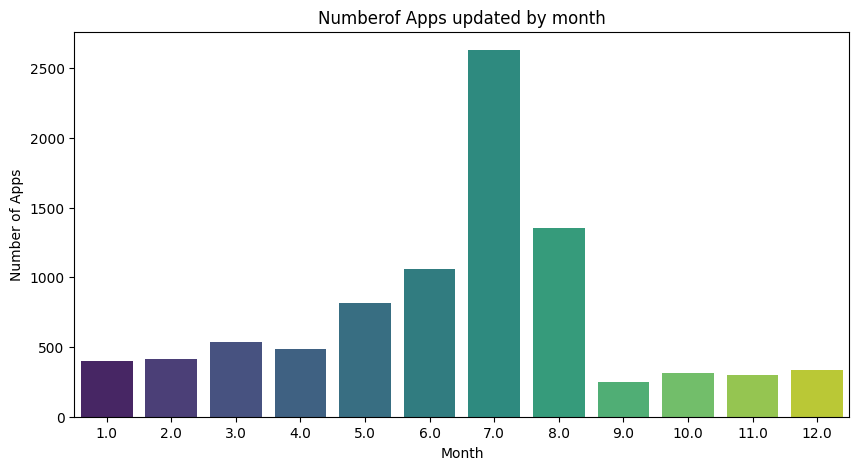

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='month', data = data, palette= 'viridis')
plt.title('Numberof Apps updated by month')
plt.xlabel('Month')
plt.ylabel('Number of Apps')
plt.show()

1. Peak updates in July (Month 7):
July shows the highest number of app updates, crossing 2500 apps — much higher than any other month.

2. Gradual increase till July:
From January (1) to July (7), there is a steady rise in the number of app updates.

3. Sharp decline after July:
After the peak in July, updates drop sharply from August (8) onward — reaching their lowest during September to December.

4. Lowest updates in September to December:
Fewer updates during these months may also indicate a stabilization period after mid-yearreleases.

Chart3- which day of week most updates happen


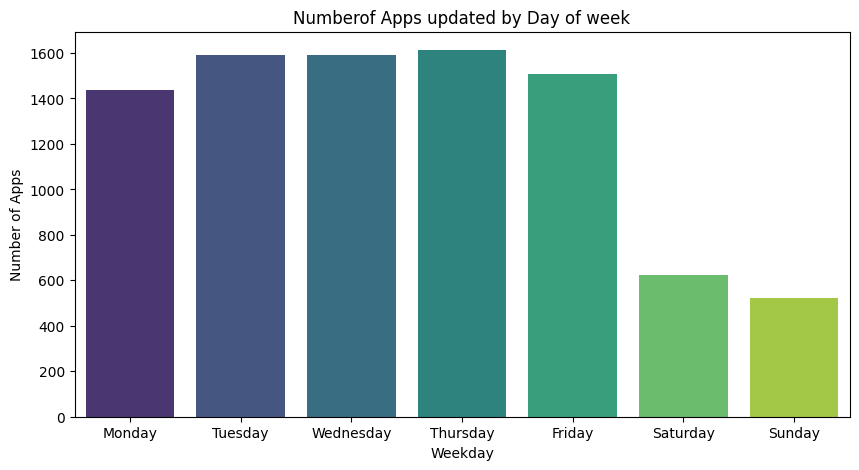

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='weekday', data = data,order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette= 'viridis')
plt.title('Numberof Apps updated by Day of week')
plt.xlabel('Weekday')
plt.ylabel('Number of Apps')
plt.show()

Monday to Thursday show the highest number of app updates (around 1400-1600).

This indicates that developers prefer working days for publishing and testing updates.



The highest number of updates occur on Wednesday, followed closely by Tuesday and Thursday.

Saturday and Sunday have the fewest updates — roughly half or less than weekday activity.

Developers may avoid Friday updates to prevent unresolved weekend issues or downtime.

The highest number of updates occur on Wednesday, followed closely by Tuesday and Thursday.



Saturday and Sunday have the fewest updates — roughly half or less than weekday activity.



Developers may avoid Friday updates to prevent unresolved weekend issues or downtime.






Chart4- Average rating per year

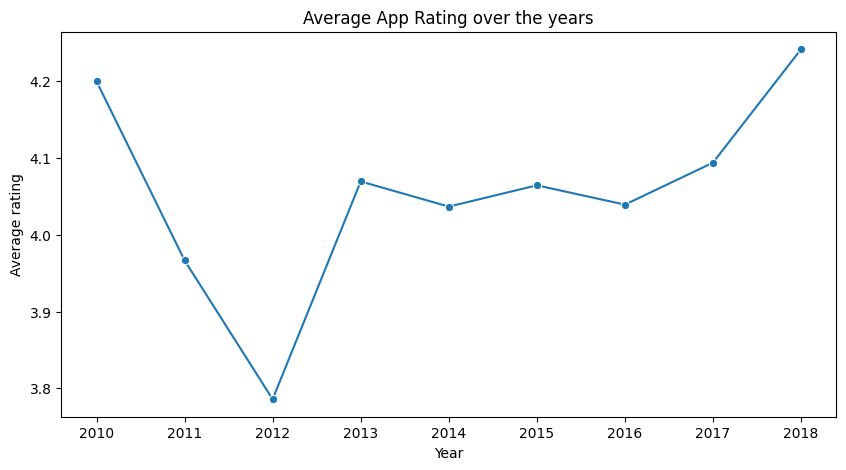

In [ ]:
avg_rating = data.groupby('year')['Rating'].mean().reset_index()
plt.figure(figsize = (10,5))
sns.lineplot(x='year',y = 'Rating', data = avg_rating, marker = 'o')
plt.title('Average App Rating over the years')
plt.xlabel('Year')
plt.ylabel('Average rating')
plt.show()

The average rating started around 4.2 in 2010, dropped slightly in the early years, but rose again steadily after 2013, reaching above 4.2 by 2018.


The lowest average rating (around 3.8) occurred in 2012, indicating that many apps might have faced performance, usability, or quality issues during that period.


From 2013 to 2018, ratings gradually improved — possibly due to:
1-Better app development practices
2-More focus on user experience and updates
3-Stricter app store guidelines improving overall app quality

The highest average rating is seen in 2018 (above 4.2), suggesting that apps became more stable, feature-rich, and reliable by that year

Regular updates and bug fixes likely helped boost ratings. Developers should continue frequent updates (as seen in your earlier chart).


Analyzing user reviews and acting on them could have contributed to higher ratings — this should remain a key strategy.


The 2012 dip warns that when app numbers grow rapidly, quality control becomes crucial.

Chart5- which app genres update most often


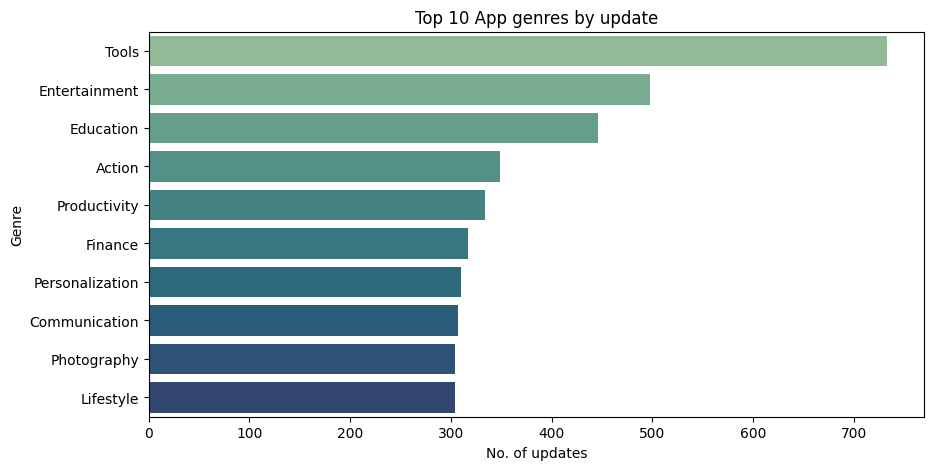

In [ ]:
top_genres = data['Genres'].value_counts().head(10).reset_index()
top_genres.columns = ['Genre','Count']
plt.figure(figsize = (10,5))
sns.barplot(x='Count',y = 'Genre', data = top_genres, palette = 'crest')
plt.title('Top 10 App genres by update')
plt.xlabel('No. of updates')
plt.ylabel('Genre')
plt.show()

The Tools category clearly leads, with around 750+ updates, far higher than any other genre.



Entertainment and Education apps show a high number of updates — likely due to frequent content changes, new features, and bug fixes.



These categories also receive regular updates, but less frequently than the top three.


These categories have fewer updates compared to the top performers but still show consistent maintenance activity — indicating stable but important sectors.

These apps receive relatively fewer updates (around 200-300).



Focus on frequent updates in high-demand categories like Tools, Entertainment, and Education to stay competitive and maintain ratings.

Use user feedback and app performance data to decide update frequency.


Entering categories like Tools or Education may require more maintenance effort but offer higher user engagement.

If seeking lower competition, genres like Lifestyle or Photography could be explored.

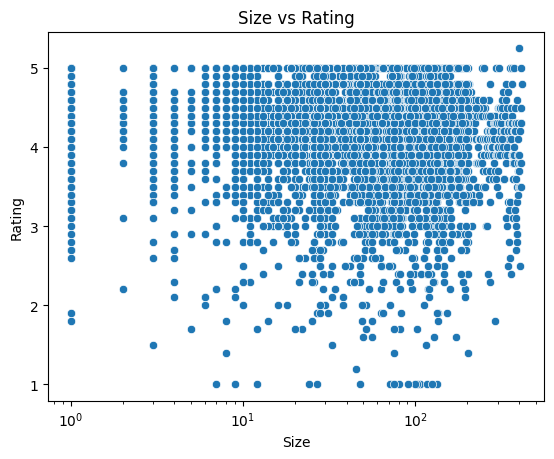

In [ ]:
sns.scatterplot(x = 'Size', y= 'Rating', data = data)
plt.title('Size vs Rating')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

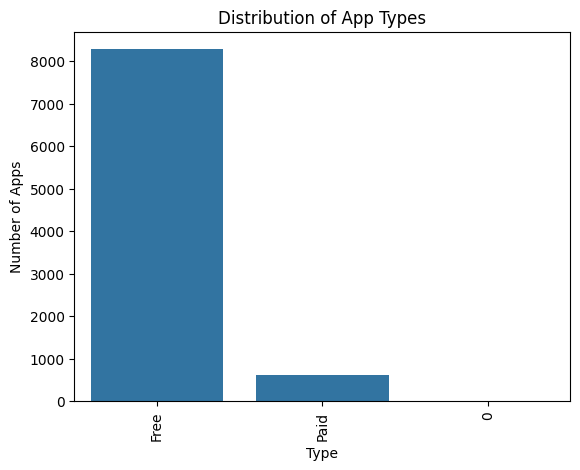

In [ ]:
sns.countplot(x = 'Type' , data = data)
plt.title('Distribution of App Types')
plt.xlabel('Type')
plt.ylabel('Number of Apps')
plt.xticks(rotation = 90)
plt.show()